# Восстановление золота из руды
___
# Recovery of gold from ore

Необходимо создать прототип модели машинного обучения для компании. Компания осуществляет разработку решений для повышения эффективности работы промышленных предприятих.

Основная задача модели - предсказаняи коэффициента восстановления золота из золотосодержащей руды.

Модель потенциально будет вспомогательным инструментом в оптимизации производства, как результат - избегание убытков.
___
You need to prototype a machine learning model for your company. The company develops solutions to improve the efficiency of industrial enterprises.

The main task of the model is to predict the recovery factor of gold from gold ore.

The model will potentially be an auxiliary tool in the optimization of production, as a result - the avoidance of losses.

## Подготовка данных
___
## Data preparation

In [1]:
pip install nb_black

  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=956181872b50e12481a9341c4320ccbd0d5335c1e950b1901f86d60505065d9d
  Stored in directory: c:\users\kiril\appdata\local\pip\cache\wheels\25\9d\fc\6312e3d8a66c164cc7f9d80bc66cc25de03a362a30b9f84aa3
Successfully built nb-black
Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import re
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from random import sample
from numpy.random import RandomState
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("gold_recovery_full_new.csv")

<IPython.core.display.Javascript object>

In [5]:
df_train = pd.read_csv("gold_recovery_train_new.csv")

<IPython.core.display.Javascript object>

In [6]:
df_test = pd.read_csv("gold_recovery_test_new.csv")

<IPython.core.display.Javascript object>

In [7]:
df.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<IPython.core.display.Javascript object>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


<IPython.core.display.Javascript object>

In [9]:
df_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<IPython.core.display.Javascript object>

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


<IPython.core.display.Javascript object>

In [11]:
df_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<IPython.core.display.Javascript object>

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

<IPython.core.display.Javascript object>

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между расчётами и значением признака.
___
Let's check that the enrichment efficiency is calculated correctly. Let's calculate it on the training sample for the feature rougher.output.recovery. Let's find MAE between calculations and feature value.

In [13]:
df_train["rougher.output.recovery"]

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

<IPython.core.display.Javascript object>

Создадим формулу подсчета эффективности обогащения и рассчитаем ее заново.
___
Let's create a formula for calculating the enrichment efficiency and calculate it again.

In [14]:
def rougher_output_recovery(
    rougher_output_concentrate_au, rougher_input_feed_au, rougher_output_tail_au
):
    return (
        (
            rougher_output_concentrate_au
            * (rougher_input_feed_au - rougher_output_tail_au)
        )
        / (
            rougher_input_feed_au
            * (rougher_output_concentrate_au - rougher_output_tail_au)
        )
        * 100
    )

<IPython.core.display.Javascript object>

In [15]:
ror_train_recalc = rougher_output_recovery(
    df_train["rougher.output.concentrate_au"],
    df_train["rougher.input.feed_au"],
    df_train["rougher.output.tail_au"],
)

<IPython.core.display.Javascript object>

In [16]:
print(
    "MAE=", mean_absolute_error(df_train["rougher.output.recovery"], ror_train_recalc)
)

MAE= 9.73512347450521e-15


<IPython.core.display.Javascript object>

Значение **MAE** практически нулевое, значит первоначальные значения рассчитаны правильно.
___
The value of **MAE** is practically zero, which means that the initial values are calculated correctly.

Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
___
Let's analyze the features that are not available in the test sample. What are these parameters? What type are they?

In [17]:
res = [x for x in list(df_train.columns) + list(df_test.columns) if x not in list(df_train.columns) or x not in list(df_test.columns)] 
print('Количество отсутствующих в тестовой выборке признаков:', len(res))
print(res)
if not res: 
    print("Списки df_train.columns and df_test.columns идентичны") 
else: 
    print("Списки df_train.columns and df_test.columns отличаются")


Количество отсутствующих в тестовой выборке признаков: 34
['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.outpu

<IPython.core.display.Javascript object>

**input** — параметры сырья, **state** — параметры, характеризующие текущее состояние этапа. 

Соответственно признаков, описывающих **output**(*параметры продукта*) и **calculation**(*расчётные характеристики*) в данной выборке не имеется, только лишь стартовые показатели и показатели непосредственно процессов.
___
**input** — raw material parameters, **state** — parameters characterizing the current stage state.

Accordingly, there are no signs describing **output**(*product parameters*) and **calculation**(*calculated characteristics*) in this sample, only starting indicators and indicators of the processes themselves.

Приступим к предобработке данных.
___
Let's start preprocessing the data.

In [18]:
def convert_to_dt(df, column_name):
    return pd.to_datetime(df[column_name])

<IPython.core.display.Javascript object>

Создаем функцию для упрощения преобразования.
___
We create a function to simplify the conversion.

In [19]:
df["date"] = convert_to_dt(df, "date")

<IPython.core.display.Javascript object>

In [20]:
df_train["date"] = convert_to_dt(df_train, "date")

<IPython.core.display.Javascript object>

In [21]:
df_test["date"] = convert_to_dt(df_test, "date")

<IPython.core.display.Javascript object>

In [23]:
df.duplicated().mean()

0.0

<IPython.core.display.Javascript object>

In [24]:
df_train.duplicated().mean()

0.0

<IPython.core.display.Javascript object>

In [25]:
df_test.duplicated().mean()

0.0

<IPython.core.display.Javascript object>

In [29]:
df.isna().sum().max()

1748

<IPython.core.display.Javascript object>

In [30]:
df_train.isna().sum().max()

1605

<IPython.core.display.Javascript object>

In [31]:
df_test.isna().sum().max()

25

<IPython.core.display.Javascript object>

Во всех датасетах имеютя пропуски, чтобы устранить NaN и не потерять ценную информацию будем использовать метод прямого заполнения. Предварительно оценим доли этих пропусков.
___
In all datasets, there are gaps, in order to eliminate NaN and not lose valuable information, we will use the direct filling method. Let us preliminarily estimate the shares of these omissions.

In [32]:
print(
    "Процент потенциально удаляемых строк:",
    ((df.isna().sum().max() / df.count()) * 100).mean(),
    "%",
)

Процент потенциально удаляемых строк: 9.017174635731791 %


<IPython.core.display.Javascript object>

In [33]:
print(
    "Процент потенциально удаляемых строк:",
    ((df_train.isna().sum().max() / df.count()) * 100).mean(),
    "%",
)

Процент потенциально удаляемых строк: 8.279499594021468 %


<IPython.core.display.Javascript object>

In [34]:
print(
    "Процент потенциально удаляемых строк:",
    ((df_test.isna().sum().max() / df.count()) * 100).mean(),
    "%",
)

Процент потенциально удаляемых строк: 0.12896416813117556 %


<IPython.core.display.Javascript object>

Доля приличная, удаление может повлиять на последующий результат. Используем метод прямого заполнения.
___
The share is decent, the removal may affect the subsequent result. We use the direct filling method.

In [35]:
df = df.ffill()
df_train = df_train.ffill()
df_test = df_test.ffill()

<IPython.core.display.Javascript object>

In [36]:
df.isna().sum().max()
df_train.isna().sum().max()
df_test.isna().sum().max()

0

<IPython.core.display.Javascript object>

Пропуски обработаны.

Сделаем столбцы дата индексом датасетов для облегчения взаимодействия между ними.
___
Passes processed.

Let's make the date columns an index of datasets to facilitate interaction between them.

In [37]:
df = df.set_index("date")
df_train = df_train.set_index("date")
df_test = df_test.set_index("date")

<IPython.core.display.Javascript object>

Подгрузим отсутствующие признаки из полного датасета в тестовый.
___
Let's load the missing features from the full dataset into the test one.

In [38]:
df_test_for_slpit = df_test.merge(
    df[
        [
            "final.output.concentrate_ag",
            "final.output.concentrate_pb",
            "final.output.concentrate_sol",
            "final.output.concentrate_au",
            "final.output.recovery",
            "final.output.tail_ag",
            "final.output.tail_pb",
            "final.output.tail_sol",
            "final.output.tail_au",
            "primary_cleaner.output.concentrate_ag",
            "primary_cleaner.output.concentrate_pb",
            "primary_cleaner.output.concentrate_sol",
            "primary_cleaner.output.concentrate_au",
            "primary_cleaner.output.tail_ag",
            "primary_cleaner.output.tail_pb",
            "primary_cleaner.output.tail_sol",
            "primary_cleaner.output.tail_au",
            "rougher.calculation.sulfate_to_au_concentrate",
            "rougher.calculation.floatbank10_sulfate_to_au_feed",
            "rougher.calculation.floatbank11_sulfate_to_au_feed",
            "rougher.calculation.au_pb_ratio",
            "rougher.output.concentrate_ag",
            "rougher.output.concentrate_pb",
            "rougher.output.concentrate_sol",
            "rougher.output.concentrate_au",
            "rougher.output.recovery",
            "rougher.output.tail_ag",
            "rougher.output.tail_pb",
            "rougher.output.tail_sol",
            "rougher.output.tail_au",
            "secondary_cleaner.output.tail_ag",
            "secondary_cleaner.output.tail_pb",
            "secondary_cleaner.output.tail_sol",
            "secondary_cleaner.output.tail_au",
        ]
    ],
    left_index=True,
    right_index=True,
)

<IPython.core.display.Javascript object>

Дополнительно выровняем индексы колонок.
___
Let's additionally align the column indexes.

In [39]:
df_test_for_slpit = df_test_for_slpit.reindex(columns=list(df_train.columns))

<IPython.core.display.Javascript object>

Данные обработаны и готовы для анализа.
___
The data has been processed and is ready for analysis.

## Анализ данных
___
## Data analysis

Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
___
See how the concentration of metals (Au, Ag, Pb) changes at different stages of purification. Describe the findings.

In [40]:
df_train["primary_cleaner.output.concentrate_pb"].mean()

9.568544006770502

<IPython.core.display.Javascript object>

In [41]:
table = [
    [
        df_train["rougher.output.concentrate_ag"].mean(),
        df_train["primary_cleaner.output.concentrate_ag"].mean(),
        df_train["final.output.concentrate_ag"].mean(),
    ],
    [
        df_train["rougher.output.concentrate_au"].mean(),
        df_train["primary_cleaner.output.concentrate_au"].mean(),
        df_train["final.output.concentrate_au"].mean(),
    ],
    [
        df_train["rougher.output.concentrate_pb"].mean(),
        df_train["primary_cleaner.output.concentrate_pb"].mean(),
        df_train["final.output.concentrate_pb"].mean(),
    ],
]

columns = ["флотация", "первичная очистка", "финальные хар-ки"]
index = ["Ag", "Au", "Pb"]
table_1 = pd.DataFrame(table, index, columns)
display(table_1)

,флотация,первичная очистка,финальные хар-ки
Ag,11.775812,8.200916,5.141921
Au,19.439958,32.386836,44.003792
Pb,7.664555,9.568544,10.132848


<IPython.core.display.Javascript object>

C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

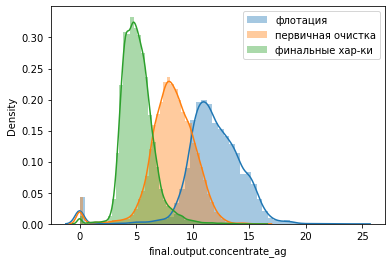

<IPython.core.display.Javascript object>

In [42]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.output.concentrate_ag"], label="флотация", ax=ax)
sns.distplot(
    df_train["primary_cleaner.output.concentrate_ag"], label="первичная очистка", ax=ax
)
sns.distplot(df_train["final.output.concentrate_ag"], label="финальные хар-ки", ax=ax)

ax.legend()

C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

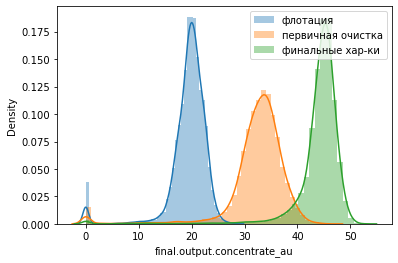

<IPython.core.display.Javascript object>

In [43]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.output.concentrate_au"], label="флотация", ax=ax)
sns.distplot(
    df_train["primary_cleaner.output.concentrate_au"], label="первичная очистка", ax=ax
)
sns.distplot(df_train["final.output.concentrate_au"], label="финальные хар-ки", ax=ax)

ax.legend()

C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

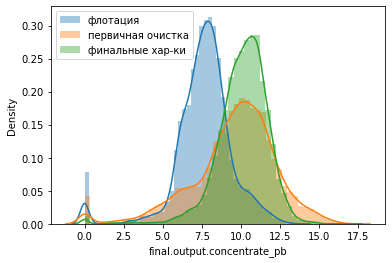

<IPython.core.display.Javascript object>

In [44]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.output.concentrate_pb"], label="флотация", ax=ax)
sns.distplot(
    df_train["primary_cleaner.output.concentrate_pb"], label="первичная очистка", ax=ax
)
sns.distplot(df_train["final.output.concentrate_pb"], label="финальные хар-ки", ax=ax)

ax.legend()

Анализ показал значительное снижение концентрации серебра, незначительное снижение концентрации свинца и значительное повышение концентрации золота.
___
The analysis showed a significant decrease in the concentration of silver, a slight decrease in the concentration of lead and a significant increase in the concentration of gold.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
___
Let us compare the size distributions of raw material granules on the training and test samples. If the distributions are very different from each other, the estimation of the model will be wrong.

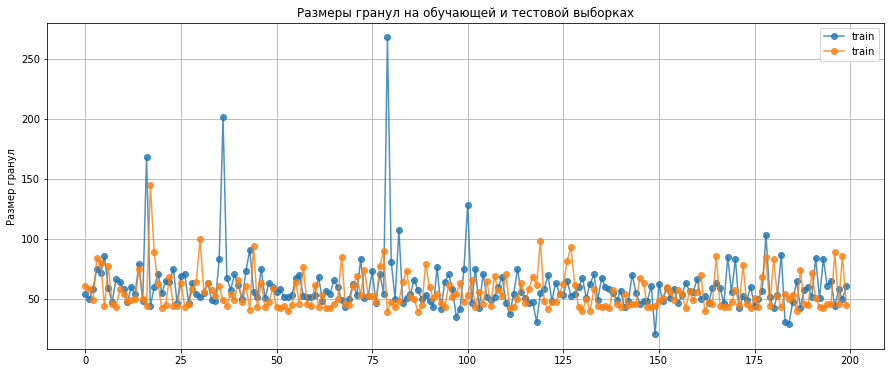

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title("Размеры гранул на обучающей и тестовой выборках")

tmp = (
    df_train["rougher.input.feed_size"]
    .sample(200, random_state=1)
    .reset_index(drop=True)
)
tmp.plot(x="", style="o-", label="train", alpha=0.8, grid=True)

tmp2 = (
    df_test["rougher.input.feed_size"]
    .sample(200, random_state=1)
    .reset_index(drop=True)
)
tmp2.plot(x="", style="o-", label="train", alpha=0.8, grid=True)

plt.ylabel("Размер гранул")
plt.legend()
plt.show()

Распределения размеров гранул сырья на обучающей и тестовой выборках не обладают сильными различиями за исключением ряда выбросов в обучающей выборке. Выбросы - условное название, фактически это есть настоящие данные, которые в ряде случаев выходят за рамки.
___
The size distributions of raw material granules on the training and test sets do not have strong differences, with the exception of a number of outliers in the training set. Emissions - a conventional name, in fact, these are real data, which in some cases go beyond.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
___
We investigate the total concentration of all substances at different stages: in raw materials, in roughing and final concentrates.

In [46]:
table = [
    [
        df_train["rougher.input.feed_ag"].sum(),
        df_train["rougher.output.concentrate_ag"].sum(),
        df_train["final.output.concentrate_ag"].sum(),
    ],
    [
        df_train["rougher.input.feed_au"].sum(),
        df_train["rougher.output.concentrate_au"].sum(),
        df_train["final.output.concentrate_au"].sum(),
    ],
    [
        df_train["rougher.input.feed_pb"].sum(),
        df_train["rougher.output.concentrate_pb"].sum(),
        df_train["final.output.concentrate_pb"].sum(),
    ],
    [
        df_train["rougher.input.feed_sol"].sum(),
        df_train["rougher.output.concentrate_sol"].sum(),
        df_train["final.output.concentrate_sol"].sum(),
    ],
]

df_train["rougher.output.concentrate_sol"]

columns = ["сырье", "черновой концентрат", "финальный концентрат"]
index = ["Ag", "Au", "Pb", "Sol"]
table_1 = pd.DataFrame(table, index, columns)
display(table_1)

,сырье,черновой концентрат,финальный концентрат
Ag,121387.032837,166615.968436,72753.039166
Au,111304.195736,275055.963640,622609.647646
Pb,49598.819723,108445.785179,143369.662930
Sol,513480.408925,400315.116968,128887.647605


<IPython.core.display.Javascript object>

C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

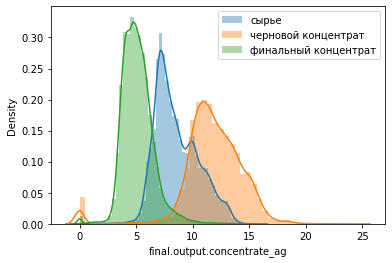

<IPython.core.display.Javascript object>

In [47]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.input.feed_ag"], label="сырье", ax=ax)
sns.distplot(
    df_train["rougher.output.concentrate_ag"], label="черновой концентрат", ax=ax
)
sns.distplot(
    df_train["final.output.concentrate_ag"], label="финальный концентрат", ax=ax
)

ax.legend()

C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

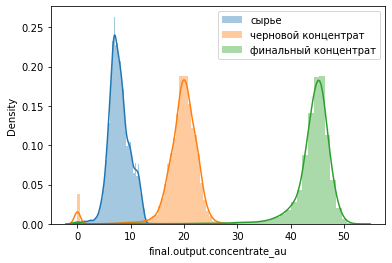

<IPython.core.display.Javascript object>

In [48]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.input.feed_au"], label="сырье", ax=ax)
sns.distplot(
    df_train["rougher.output.concentrate_au"], label="черновой концентрат", ax=ax
)
sns.distplot(
    df_train["final.output.concentrate_au"], label="финальный концентрат", ax=ax
)

ax.legend()

C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

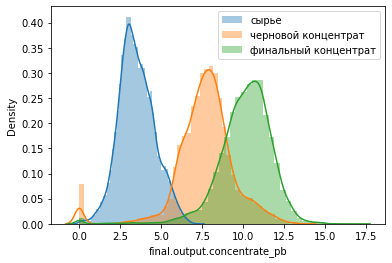

<IPython.core.display.Javascript object>

In [49]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.input.feed_pb"], label="сырье", ax=ax)
sns.distplot(
    df_train["rougher.output.concentrate_pb"], label="черновой концентрат", ax=ax
)
sns.distplot(
    df_train["final.output.concentrate_pb"], label="финальный концентрат", ax=ax
)

ax.legend()

C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kiril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

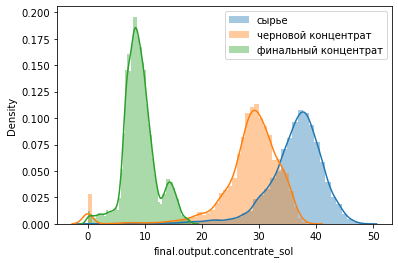

<IPython.core.display.Javascript object>

In [50]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.input.feed_sol"], label="сырье", ax=ax)
sns.distplot(
    df_train["rougher.output.concentrate_sol"], label="черновой концентрат", ax=ax
)
sns.distplot(
    df_train["final.output.concentrate_sol"], label="финальный концентрат", ax=ax
)

ax.legend()

В случае всех веществ есть выбросы - нулевые значения, в ряде случаев - отрицательные, от них необходимо избавиться, чтобы модель делала качественные предсказания.
___
In the case of all substances, there are outliers - zero values, in some cases - negative, they must be eliminated in order for the model to make qualitative predictions.

In [51]:
df_train = df_train[df_train["primary_cleaner.output.concentrate_au"] > 0]
df_train = df_train[df_train["rougher.input.feed_au"] > 0]
df_train = df_train[df_train["rougher.output.concentrate_au"] > 0]
df_train = df_train[df_train["final.output.concentrate_au"] > 0]

<IPython.core.display.Javascript object>

In [52]:
df_train = df_train[df_train["primary_cleaner.output.concentrate_ag"] > 0]
df_train = df_train[df_train["rougher.input.feed_ag"] > 0]
df_train = df_train[df_train["rougher.output.concentrate_ag"] > 0]
df_train = df_train[df_train["final.output.concentrate_ag"] > 0]

<IPython.core.display.Javascript object>

In [53]:
df_train = df_train[df_train["primary_cleaner.output.concentrate_pb"] > 0]
df_train = df_train[df_train["rougher.input.feed_pb"] > 0]
df_train = df_train[df_train["rougher.output.concentrate_pb"] > 0]
df_train = df_train[df_train["final.output.concentrate_pb"] > 0]

<IPython.core.display.Javascript object>

In [54]:
df_train = df_train[df_train["primary_cleaner.output.concentrate_sol"] > 0]
df_train = df_train[df_train["rougher.input.feed_sol"] > 0]
df_train = df_train[df_train["rougher.output.concentrate_sol"] > 0]
df_train = df_train[df_train["final.output.concentrate_sol"] > 0]

<IPython.core.display.Javascript object>

Аномальные значения удалены.
___
Outliers removed.

## Модель
___
## Model

Напишем функцию для вычисления итоговой sMAPE.
___
Let's write a function to calculate the final sMAPE.

In [55]:
def sMAPE_score(rougher_real, rougher_predicted):
    return (
        np.mean(
            abs(rougher_real - rougher_predicted)
            / ((abs(rougher_real) + abs(rougher_predicted)) / 2)
        )
        * 100
    )

<IPython.core.display.Javascript object>

In [56]:
def sMAPE_total_score(
    rougher_real,
    rougher_predicted,
    final_real,
    final_predicted,
):
    rougher_sMAPE = sMAPE_score(rougher_real, rougher_predicted)
    final_sMAPE = sMAPE_score(final_real, final_predicted)

    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

<IPython.core.display.Javascript object>

Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.
___
We will train different models and evaluate their quality by cross-validation. Let's choose the best model and check it on the test set.

In [59]:
df_train_ml = df_train.reindex(columns=list(df_test.columns))

<IPython.core.display.Javascript object>

In [60]:
features_train = df_train_ml

target_train_rougher = df_train["rougher.output.recovery"]
target_train_final = df_train["final.output.recovery"]

<IPython.core.display.Javascript object>

Создадим пригодную тестовую выборку для последующего использования в модели (с правильным количеством признаков, их порядком и т.д.)
___
Let's create a suitable test sample for subsequent use in the model (with the correct number of features, their order, etc.)

In [61]:
features_test = df_test
target_test_rougher = df_test_for_slpit["rougher.output.recovery"]
target_test_final = df_test_for_slpit["final.output.recovery"]

<IPython.core.display.Javascript object>

In [62]:
features_test.head(2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


<IPython.core.display.Javascript object>

In [63]:
features_train.head(2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


<IPython.core.display.Javascript object>

In [64]:
state = RandomState(12345)

<IPython.core.display.Javascript object>

In [65]:
smape = make_scorer(sMAPE_score, greater_is_better=False)

<IPython.core.display.Javascript object>

In [66]:
params_dtr_grid = {"max_depth": range(1, 6)}

model_dtr_rougher = DecisionTreeRegressor(random_state=state)

grid_dtr_rougher = GridSearchCV(
    model_dtr_rougher, param_grid=params_dtr_grid, cv=5, scoring=smape, refit=True
)
grid_dtr_rougher.fit(features_train, target_train_rougher)
params_dtr_grid_rougher = grid_dtr_rougher.best_params_
grid_dtr_best_rougher = DecisionTreeRegressor(
    **params_dtr_grid_rougher, random_state=state
)
grid_dtr_best_rougher.fit(features_train, target_train_rougher)

print("Лучшие параметры для модели DecisionTreeRegressor:", params_dtr_grid_rougher)

Лучшие параметры для модели DecisionTreeRegressor: {'max_depth': 4}


<IPython.core.display.Javascript object>

In [67]:
params_rfr_grid = {"max_depth": range(1, 20, 3)}

model_rfr_rougher = RandomForestRegressor(random_state=state)

grid_rfr_rougher = GridSearchCV(
    model_rfr_rougher, params_rfr_grid, cv=3, n_jobs=-1, verbose=2, scoring=smape
)
grid_rfr_rougher.fit(features_train, target_train_rougher)
params_rfr_grid_rougher = grid_rfr_rougher.best_params_
grid_rfr_best_rougher = RandomForestRegressor(
    **params_rfr_grid_rougher, random_state=state
)
grid_rfr_best_rougher.fit(features_train, target_train_rougher)

print("Лучшие параметры для модели RandomForestRegressor:", params_rfr_grid_rougher)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Лучшие параметры для модели RandomForestRegressor: {'max_depth': 16}


<IPython.core.display.Javascript object>

In [68]:
model_lr_rougher = LinearRegression()
parameters = {
    "fit_intercept": [True, False],
    "normalize": [True, False],
    "copy_X": [True, False],
}
grid_lr_rougher = GridSearchCV(
    model_lr_rougher, param_grid=parameters, cv=5, scoring=smape, refit=True
)
grid_lr_rougher.fit(features_train, target_train_rougher)
params_lr_grid_rougher = grid_lr_rougher.best_params_
grid_lr_best_rougher = LinearRegression(**params_lr_grid_rougher)
grid_lr_best_rougher.fit(features_train, target_train_rougher)

print("Лучшие параметры для модели LinearRegression:", params_lr_grid_rougher)
grid_lr_rougher.best_score_

Лучшие параметры для модели LinearRegression: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


-7.270025499957137

<IPython.core.display.Javascript object>

In [69]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train_rougher)

DummyClassifier(strategy='most_frequent')

<IPython.core.display.Javascript object>

In [70]:
rougher_predicted_dtr = grid_dtr_best_rougher.predict(features_test)
final_predicted_dtr = grid_dtr_best_rougher.predict(features_test)
rougher_predicted_rfr = grid_rfr_best_rougher.predict(features_test)
final_predicted_rfr = grid_rfr_best_rougher.predict(features_test)
rougher_predicted_lr = grid_lr_best_rougher.predict(features_test)
final_predicted_lr = grid_lr_best_rougher.predict(features_test)
predicted_dummy = dummy_clf.predict(features_test)

<IPython.core.display.Javascript object>

In [71]:
table = [
    [
        sMAPE_total_score(
            target_test_rougher,
            rougher_predicted_dtr,
            target_test_final,
            final_predicted_dtr,
        ),
        sMAPE_total_score(
            target_test_rougher,
            rougher_predicted_rfr,
            target_test_final,
            final_predicted_rfr,
        ),
        sMAPE_total_score(
            target_test_rougher,
            rougher_predicted_lr,
            target_test_final,
            final_predicted_lr,
        ),
        sMAPE_total_score(
            target_test_rougher,
            predicted_dummy,
            target_test_final,
            predicted_dummy,
        ),
    ]
]
columns = ["dtr", "rfr", "lr", "dummy"]
index = ["total_SMAPE"]
table_2 = pd.DataFrame(table, index, columns)
display(table_2)

,dtr,rfr,lr,dummy
total_SMAPE,19.86271,19.980664,19.51421,33.325326


<IPython.core.display.Javascript object>

In [72]:
print("Наиболее подходящая модель:", grid_lr_best_rougher)

Наиболее подходящая модель: LinearRegression(normalize=True)


<IPython.core.display.Javascript object>

Указанная выше модель является оптимальной для поставленной задачей, что видно из эксперимента.
___
The above model is optimal for the task, as can be seen from the experiment.

Резюме проделанной работы:

    1) Предварительная обработка подразумевала (имеется в виду кроме поиска аномалий,дубликатов и т.д.) в том числе доработку предложенной тестовой выборки, добавление признаков из основного датасета, выравнивание порядка признаков (столбцов) для правильного подбора модели в дальнейшем;
    
    2) Анализ содержания указанных в данных элементов на разных этапах обработки показал:
        - значительное снижение концентрации серебра;
        - незначительное снижение концентрации свинца;
        - значительное повышение концентрации золот;
        
    3) Схожие результаты были получены при исследовании суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах;
    
    4) Был произведен подбор моделей с использованием метрики sMAPE, в результате которого, с помощью теста, была определена наиболее эффективная модель - LinearRegression: {'copy_X': True, 'fit_intercept': True, 'normalize': False}. Показатели метрик были сравнены с константной моделью.
___
Summary of work done:

    1) Pre-processing meant (meaning, in addition to searching for anomalies, duplicates, etc.), including the refinement of the proposed test set, the addition of features from the main dataset, the alignment of the order of features (columns) for the correct selection of the model in the future;
    
    2) Analysis of the content of the elements indicated in these data at different stages of processing showed:
        - a significant decrease in the concentration of silver;
        - a slight decrease in the concentration of lead;
        - a significant increase in the concentration of gold;
        
    3) Similar results were obtained in the study of the total concentration of all substances at different stages: in raw materials, in rough and final concentrates;
    
    4) Models were selected using the sMAPE metric, as a result of which, using the test, the most effective model was determined - LinearRegression: {'copy_X': True, 'fit_intercept': True, 'normalize': False}. The metrics scores were compared with the constant model.